In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow import keras
import tensorflow as tf

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
data=pd.read_csv("/home/hemanth/Documents/DeepLearning/MLP/cancer_reg.csv",encoding='ISO-8859-1')

In [5]:
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [6]:
data.tail()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap           binnedInc  \
3042      46961        6343            12.4     0.000000    (45201, 48021.6]   
3043      48609       37118            18.8   377.175494  (48021.6, 51046.4]   
3044      51144       34536            15.0  1968.959926  (51046.4, 54545.6]   
3045      50745       25609            13.3     0.000000  (48021.6, 51046.4]   
3046      41193       37030            13.9     0.000000  (40362.7, 42724.4]   

      MedianAge  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
3042       44.2  ...                     54.9                44.6   
3043       30.4  ...                     53.3                48.6   
3044       30.9  ...                     52.6                47.8   
3045       39.0  ...                     56.3                49.6   
3046       26.2  ...                     60.3                22.9   

     PctPublicCoverage  PctPublicCoverageAlone   PctWhite   PctBlack  \
3042              31.7                    13.2  90.280811   3.837754   
3043              28.8                    17.7  75.706245   2.326771   
3044              26.6                    16.8  87.961629   2.313188   
3045              29.5                    14.0  92.905681   1.176562   
3046              25.1                    12.6  70.098132  16.590100   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
3042  0.327613      1.700468             51.063830   7.773512  
3043  4.044920     14.130288             52.007937   8.186470  
3044  1.316472      5.680705             55.153949   7.809192  
3045  0.244632      2.131790             58.484232   7.582938  
3046  3.177753      1.356457             56.040242   8.981723  

[5 rows x 34 columns]

In [7]:
data.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [9]:
data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [14]:
data['PctSomeCol18_24'].isna().sum()

2285

In [15]:
data['PctEmployed16_Over'].isna().sum()

152

In [17]:
data['PctPrivateCoverageAlone'].isna().sum()

609

In [18]:
data['PctSomeCol18_24']=data["PctSomeCol18_24"].fillna(data['PctSomeCol18_24'].mean())
data['PctEmployed16_Over']=data['PctEmployed16_Over'].fillna(data['PctEmployed16_Over'].mean())
data['PctPrivateCoverageAlone']=data['PctPrivateCoverageAlone'].fillna(data['PctPrivateCoverageAlone'].mean())

In [19]:
data['PctSomeCol18_24'].isna().sum()

0

In [20]:
data['PctEmployed16_Over'].isna().sum()

0

In [21]:
data['PctPrivateCoverageAlone'].isna().sum()

0

In [22]:
data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [29]:
dataset=data.drop(['binnedInc','Geography','PercentMarried','AvgHouseholdSize','PctAsian', 
                   'PctOtherRace', 'PctMarriedHouseholds','studyPerCap','MedianAge', 'medIncome'],axis=1)

In [30]:
dataset.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  popEst2015  \
0       1397.0               469             164.9          489.8      260131   
1        173.0                70             161.3          411.6       43269   
2        102.0                50             174.7          349.7       21026   
3        427.0               202             194.8          430.4       75882   
4         57.0                26             144.4          350.1       10321   

   povertyPercent  MedianAgeMale  MedianAgeFemale  PctNoHS18_24  PctHS18_24  \
0            11.2           36.9             41.7          11.5        39.5   
1            18.6           32.2             33.7           6.1        22.4   
2            14.6           44.0             45.8          24.0        36.6   
3            17.1           42.2             43.4          20.2        41.2   
4            12.5           47.8             48.9          14.9        43.0   

   ...  PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0  ...                51.9                   8.0                75.1   
1  ...                55.9                   7.8                70.2   
2  ...                45.9                   7.0                63.7   
3  ...                48.3                  12.1                58.4   
4  ...                48.2                   4.8                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                48.453774                41.6               32.9   
1                53.800000                43.6               31.1   
2                43.500000                34.9               42.1   
3                40.300000                35.0               45.3   
4                43.900000                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  BirthRate  
0                    14.0  81.780529  2.594728   6.118831  
1                    15.3  89.228509  0.969102   4.333096  
2                    21.1  90.922190  0.739673   3.729488  
3                    25.0  91.744686  0.782626   4.603841  
4                    22.7  94.104024  0.270192   6.796657  

[5 rows x 24 columns]

In [31]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [32]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [33]:
print(train_dataset.shape)
print(test_dataset.shape)

(2438, 24)
(609, 24)


In [34]:
train_dataset.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'BirthRate'],
      dtype='object')

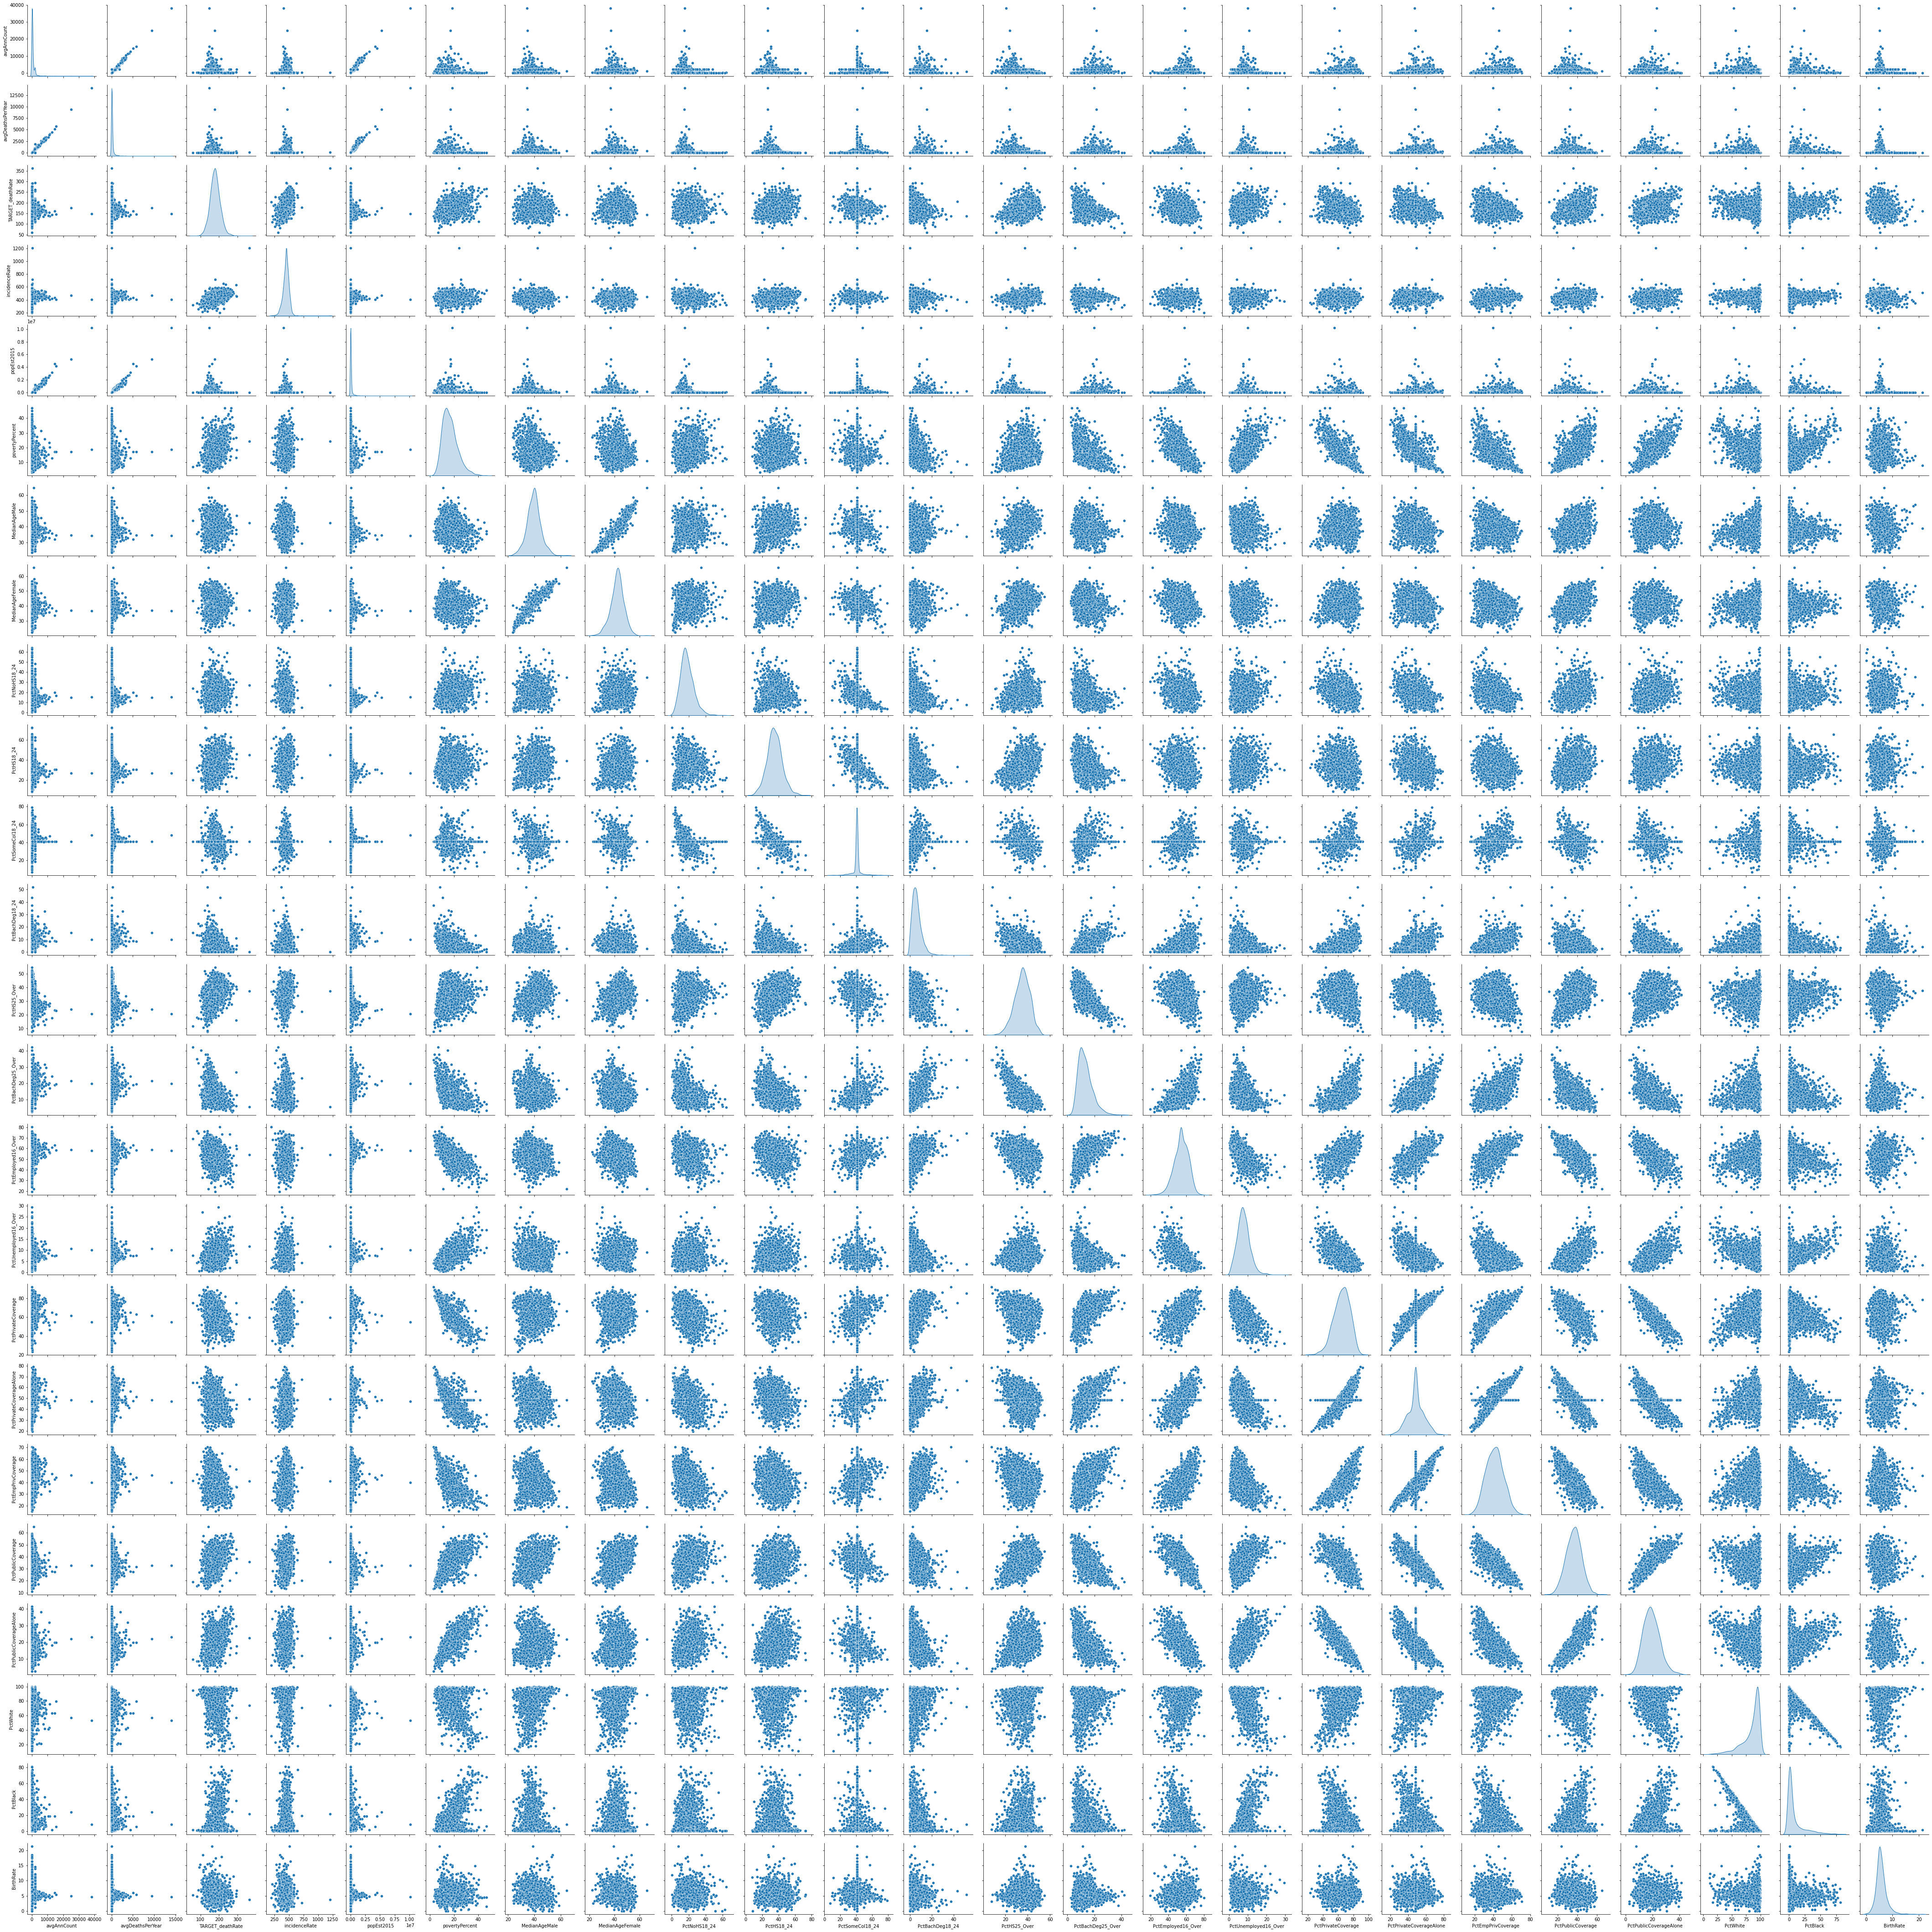

In [35]:
sns.pairplot(train_dataset[['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'BirthRate']],diag_kind='kde')

In [36]:
train_stats=train_dataset.describe()
train_stats.pop('TARGET_deathRate')
train_stats=train_stats.transpose()
train_stats

count           mean            std         min  \
avgAnnCount              2438.0     620.737150    1493.060511    6.000000   
avgDeathsPerYear         2438.0     188.463905     529.836781    3.000000   
incidenceRate            2438.0     448.760256      53.830161  201.300000   
popEst2015               2438.0  104207.118540  347935.372751  827.000000   
povertyPercent           2438.0      16.786957       6.387490    3.200000   
MedianAgeMale            2438.0      39.604881       5.226523   23.700000   
MedianAgeFemale          2438.0      42.167473       5.278783   22.300000   
PctNoHS18_24             2438.0      18.177482       8.070417    0.500000   
PctHS18_24               2438.0      34.974241       9.126227    8.000000   
PctSomeCol18_24          2438.0      41.004371       5.505161    7.100000   
PctBachDeg18_24          2438.0       6.174856       4.522357    0.000000   
PctHS25_Over             2438.0      34.833060       7.035807    7.500000   
PctBachDeg25_Over        2438.0      13.261526       5.374103    2.500000   
PctEmployed16_Over       2438.0      54.252643       8.059391   19.500000   
PctUnemployed16_Over     2438.0       7.809393       3.425780    0.400000   
PctPrivateCoverage       2438.0      64.528179      10.615034   23.400000   
PctPrivateCoverageAlone  2438.0      48.650721       8.965070   19.600000   
PctEmpPrivCoverage       2438.0      41.386669       9.419098   15.000000   
PctPublicCoverage        2438.0      36.163659       7.829727   11.200000   
PctPublicCoverageAlone   2438.0      19.164766       6.074187    2.600000   
PctWhite                 2438.0      83.847828      16.226243   11.008762   
PctBlack                 2438.0       8.936095      14.249707    0.000000   
BirthRate                2438.0       5.645068       2.003325    0.000000   

                                  25%           50%           75%  \
avgAnnCount                 76.000000    174.000000    522.000000   
avgDeathsPerYear            28.000000     62.000000    148.000000   
incidenceRate              421.625000    453.549422    481.500000   
popEst2015               11425.750000  27130.500000  69085.250000   
povertyPercent              12.100000     15.800000     20.200000   
MedianAgeMale               36.300000     39.700000     42.600000   
MedianAgeFemale             39.100000     42.400000     45.400000   
PctNoHS18_24                12.700000     17.100000     22.675000   
PctHS18_24                  29.100000     34.600000     40.700000   
PctSomeCol18_24             40.977034     40.977034     40.977034   
PctBachDeg18_24              3.100000      5.400000      8.200000   
PctHS25_Over                30.400000     35.300000     39.600000   
PctBachDeg25_Over            9.400000     12.300000     16.100000   
PctEmployed16_Over          49.200000     54.152642     60.000000   
PctUnemployed16_Over         5.500000      7.600000      9.700000   
PctPrivateCoverage          57.500000     65.200000     72.300000   
PctPrivateCoverageAlone     43.500000     48.453774     54.000000   
PctEmpPrivCoverage          34.600000     41.300000     47.700000   
PctPublicCoverage           30.800000     36.300000     41.500000   
PctPublicCoverageAlone      14.800000     18.700000     23.000000   
PctWhite                    77.944447     90.263750     95.534394   
PctBlack                     0.642386      2.209531     10.315287   
BirthRate                    4.530344      5.374117      6.529902   

                                  max  
avgAnnCount              3.815000e+04  
avgDeathsPerYear         1.401000e+04  
incidenceRate            1.206900e+03  
popEst2015               1.017029e+07  
povertyPercent           4.700000e+01  
MedianAgeMale            6.470000e+01  
MedianAgeFemale          6.570000e+01  
PctNoHS18_24             6.410000e+01  
PctHS18_24               7.250000e+01  
PctSomeCol18_24          7.900000e+01  
PctBachDeg18_24          5.180000e+01  
PctHS25_Over             5.480000e+01  


In [37]:
train_labels=train_dataset.pop('TARGET_deathRate')
test_labels=test_dataset.pop('TARGET_deathRate')

In [38]:
print(train_labels.shape)
print(test_labels.shape)

(2438,)
(609,)


In [39]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [40]:
len(train_dataset.keys())

23

In [41]:
def build_model():
    model=keras.Sequential([
        layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),## input layer
        layers.Dense(64,activation='relu'),## hidden layer
        layers.Dense(1)#output
        
      ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,metrics=['mae','mse'])
    return model

In [42]:
model=build_model()
model

In [43]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[-0.0883826 ],
       [-0.0681451 ],
       [ 0.07552664],
       [-0.01375065],
       [ 0.12135388],
       [-0.35118687],
       [ 0.2417833 ],
       [-0.05877385],
       [ 0.2039732 ],
       [ 0.1034635 ]], dtype=float32)

In [55]:
EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:266.2467,  mae:12.2190,  mse:266.2467,  val_loss:422.5148,  val_mae:14.7474,  val_mse:422.5148,  
....................................................................................................
Epoch: 100, loss:197.0161,  mae:10.6132,  mse:197.0161,  val_loss:472.7239,  val_mae:15.5937,  val_mse:472.7239,  
....................................................................................................
Epoch: 200, loss:147.9486,  mae:9.2068,  mse:147.9486,  val_loss:494.9487,  val_mae:15.7073,  val_mse:494.9487,  
....................................................................................................
Epoch: 300, loss:113.2278,  mae:8.0763,  mse:113.2278,  val_loss:539.3666,  val_mae:15.8363,  val_mse:539.3666,  
....................................................................................................
Epoch: 400, loss:91.0834,  mae:7.1689,  mse:91.0834,  val_loss:580.7202,  val_mae:16.3058,  val_mse:580.7202,  
...........................

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

loss        mae         mse    val_loss    val_mae     val_mse  epoch
0  266.246674  12.219004  266.246674  422.514801  14.747418  422.514801      0
1  266.722809  12.172775  266.722809  442.468079  15.364895  442.468079      1
2  264.920654  12.179497  264.920654  436.765411  15.004256  436.765411      2
3  264.530609  12.127604  264.530609  423.854980  14.917371  423.854980      3
4  262.322906  12.086342  262.322906  430.903931  14.894091  430.903931      4

In [57]:
hist.tail()

loss       mae        mse    val_loss    val_mae     val_mse  epoch
1995  19.741381  3.426354  19.741381  751.281982  18.965391  751.281982   1995
1996  19.653919  3.370595  19.653919  751.797913  19.010759  751.797913   1996
1997  20.244568  3.496778  20.244568  763.548157  19.175392  763.548157   1997
1998  21.089859  3.493481  21.089859  756.403931  19.002924  756.403931   1998
1999  20.420025  3.356601  20.420025  763.778503  19.088005  763.778503   1999

In [58]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Target_deathRate]')

Text(0, 0.5, 'MAE [Target_deathRate]')

In [60]:
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [Taget_ddeathRate^2]')

Text(0, 0.5, 'MSE [Taget_ddeathRate^2]')

In [61]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:29846.7051,  mae:170.4692,  mse:29846.7051,  val_loss:26253.3633,  val_mae:159.2113,  val_mse:26253.3633,  
......................................................

In [62]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [TARGET_deathRate]')

Text(0, 0.5, 'MAE [TARGET_deathRate]')

In [63]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:10.2f} TARGET_deathRate".format(mae))

20/20 - 0s - loss: 397.6133 - mae: 14.5540 - mse: 397.6133
Testing set Mean Abs Error:      14.55 TARGET_deathRate


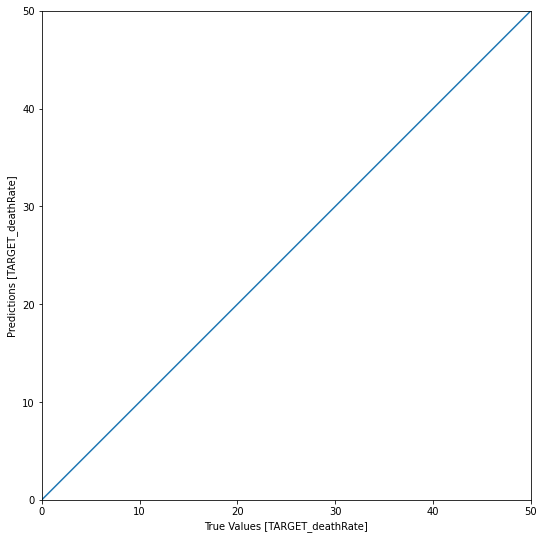

In [64]:
test_predictions = model.predict(normed_test_data).flatten()
plt.figure(figsize=(16,9))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [TARGET_deathRate]')
plt.ylabel('Predictions [TARGET_deathRate]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

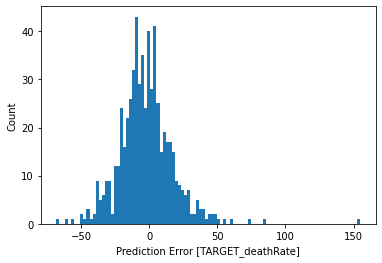

In [65]:
error = test_predictions - test_labels
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [TARGET_deathRate]")
_ = plt.ylabel("Count")